In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import  albumentations as A
import random

UsageError: Line magic function `%autoreload` not found.


In [2]:
import retinopathy.lib.augmentations as augs

In [3]:
images = ['tests/4_left.png', 'tests/35_left.png', 'tests/44_right.png', 'tests/68_right.png', 'tests/92_left.png']



In [4]:
def augment_and_show(image, augmentation, n=4):
    image = cv2.imread(image)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    augmented_images = [image]
    for i in range(n):
        augmented_images.append(augmentation(image=image)['image'])
    
    f, ax = plt.subplots(1, 1+n)
    for i,image in enumerate(augmented_images):
        ax[i].imshow(image)
    
    f.show()

C:\Anaconda3\envs\pytorch11\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


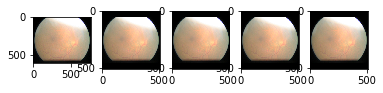

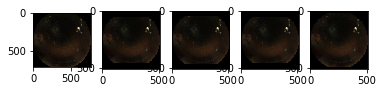

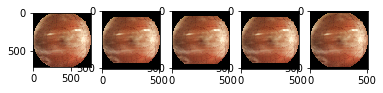

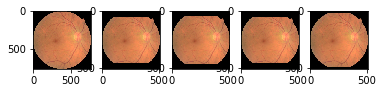

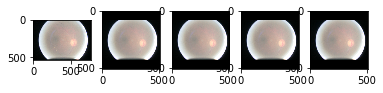

In [8]:
t = A.Compose([
    augs.CropBlackRegions(p=1),
    A.LongestMaxSize(512),
    A.PadIfNeeded(512,512, border_mode=cv2.BORDER_CONSTANT),
    augs.ZeroTopAndBottom(aspect_ratio=(1.0, 1.4),p=1)
])

for image in images:
    random.seed(42)
    augment_and_show(image, t)